# Assignment 3
## Q1

Text(0.5, 1.0, 'Trajectory')

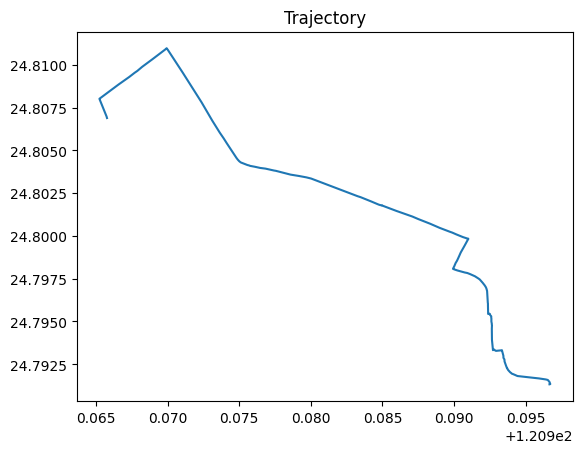

In [1]:
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt


def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[0]*t*t + ai[1]*t + ai[2]
        y[i] = bi[0]*t*t + bi[1]*t + bi[2]
        i = i + 1
    return x, y

gpx_file = open('A3_110062219.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)
plt.title("Trajectory") # title

Text(0.5, 1.0, 'Trajectory')

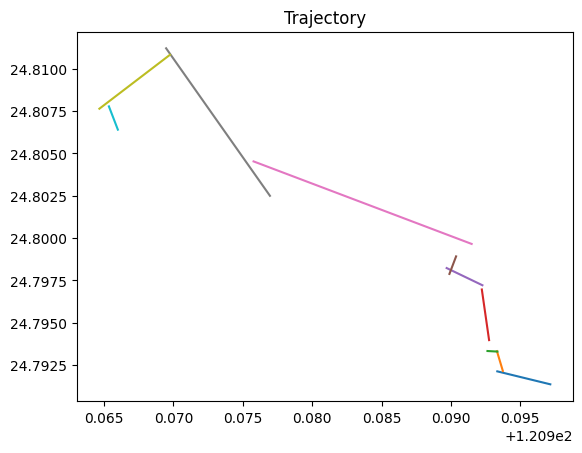

In [2]:
# We will break the trajectory into segments by hand here
seg_idx = [1, 33, 44, 56, 93, 108, 117, 165, 198, 209, 213]
            
# We need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
# Since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    idx_prev = idx

n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title

## Q2
### a)

In [3]:
A = np.random.rand(1024, 1000)
b = np.random.rand(1024)

x, residuals, *_ = np.linalg.lstsq(A, b, rcond=None)

err = np.linalg.norm(A @ x - b)**2

print(residuals[0], err)
assert np.isclose(residuals[0], err)

2.497277962232212 2.4972779622322205


### b)